In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import tensorflow as tf
from tensorflow import keras

# **1. Preprocess the Data:**

In [4]:
!unzip "/content/drive/MyDrive/GENAI/Week5/Day5/IMDB Dataset.zip"

Archive:  /content/drive/MyDrive/GENAI/Week5/Day5/IMDB Dataset.zip
  inflating: IMDB Dataset.csv        


In [5]:
file = pd.read_csv("/content/IMDB Dataset.csv")
df = pd.DataFrame(file)
df.drop_duplicates(inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = df['review'].values
labels = df['sentiment'].map({'positive':1, 'negative':0}).values

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_data = vectorize_sequences(sequences, dimension=vocab_size)
y_data = labels.astype('float32')

In [9]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# **2. Build the Model:**

In [10]:
ffn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
ffn.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# **3. Train the Model:**

In [12]:
history = ffn.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7237 - loss: 0.5276 - val_accuracy: 0.8171 - val_loss: 0.4323
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8983 - loss: 0.2585 - val_accuracy: 0.8910 - val_loss: 0.2660
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9197 - loss: 0.2035 - val_accuracy: 0.8627 - val_loss: 0.3416
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9342 - loss: 0.1703 - val_accuracy: 0.8867 - val_loss: 0.2788
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9466 - loss: 0.1375 - val_accuracy: 0.8869 - val_loss: 0.2908
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9594 - loss: 0.1096 - val_accuracy: 0.8829 - val_loss: 0.3026
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9772 - loss: 0.0746 - val_accuracy: 0.8804 - val_loss: 0.3567
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9823 - loss: 0.0559 - val_accuracy: 0.8862 - v

# **4. Evaluate the Model:**

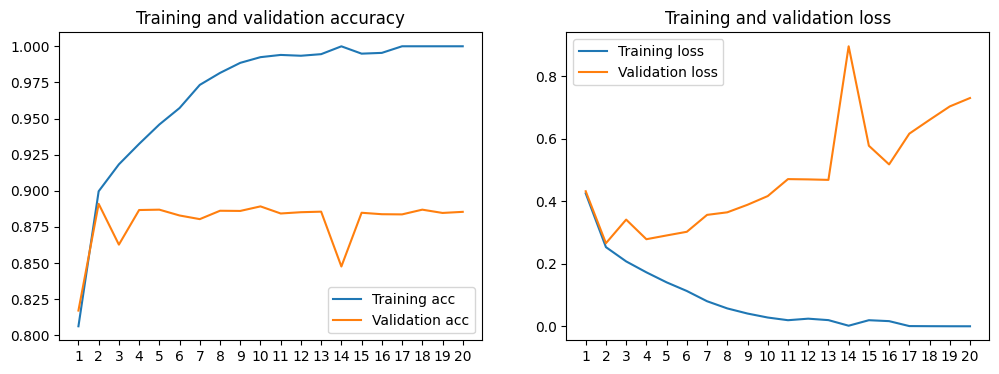

In [16]:
plt.figure(figsize=(12, 4))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [17]:
history2 = ffn.fit(
    x_train, y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 1.3777e-04 - val_accuracy: 0.8843 - val_loss: 0.7517
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 1.1051e-04 - val_accuracy: 0.8849 - val_loss: 0.7667
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 9.0880e-05 - val_accuracy: 0.8845 - val_loss: 0.7830
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 7.9894e-05 - val_accuracy: 0.8844 - val_loss: 0.7948
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 7.1763e-05 - val_accuracy: 0.8845 - val_loss: 0.8053


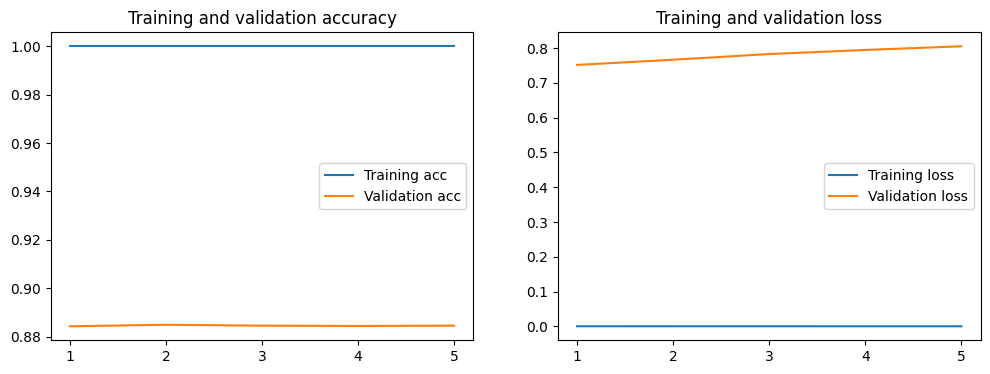

In [18]:
plt.figure(figsize=(12, 4))

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history3 = ffn.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 2.0849e-05 - val_accuracy: 0.8835 - val_loss: 0.9711
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 8.9947e-06 - val_accuracy: 0.8830 - val_loss: 0.9980
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 6.7129e-06 - val_accuracy: 0.8839 - val_loss: 1.0175


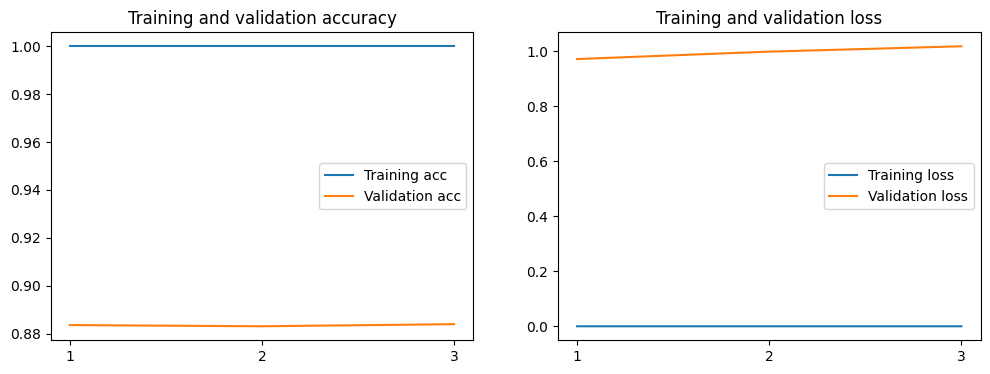

In [21]:
plt.figure(figsize=(12, 4))

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [23]:
results = ffn.evaluate(x_test, y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8832 - loss: 0.9916


# **5. Analyze Results:**

Le modèle atteint une précision de 100 % sur les données d'entraînement, mais plafonne à environ 88 % sur les données de validation dès les premières époques. La perte en validation augmente progressivement, ce qui indique un surapprentissage. Grâce à l'utilisation d'un callback EarlyStopping, l'entraînement s'est arrêté automatiquement à l’epoch 3. Le modèle final atteint une précision de 88.32 % et une perte de 0.99 sur le jeu de test, confirmant une bonne capacité de généralisation malgré un léger surajustement.

